# Es 05.1

Si richiede di implementare con l'algoritmo di Metropolis con le funzioni d'onda per l'atomo d'Idrogeno nei due casi:

- Ground state
- Stato eccitato $2p$

e di calcolarne la distanza media $\left\langle r \right\rangle$ con le relative incertezze per un numero di campionamenti di almento $10^6$.

Alcune osservazioni preliminari:

1) Le funzioni d'onda usate sono:
$$\Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} $$
per il Ground State e
$$\Psi_{2,1,0}(r,\theta,\phi)=\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)$$
per lo stato $2p$.

per cui ci si aspetta di ottenere:

$$\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0 \quad \left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$$

In entrambi i casi ho usato $a_0=1$ e tali funzioni sono state usate nella funzione di accettazione per l'algoritmo di Metropolis. 

2) Per campionare le due funzioni d'onda è stato necessario fissare un punto iniziale che non fosse nè troppo lontano dall'origine, in quanto altrimenti il campionamento ci metterebbe troppo tempo ad arrivare al valore medio cercato, nè troppo vicino, poichè altrimenti non si sarebbe riusciti ad osservare molto in quanto sarebbe stato troppo favorito dall'algoritmo di Metropolis. Pertanto i punti iniziali per le due funzioni d'onda sono :

$$O_{\Psi_{1,0,0}}=(5.0;5.0;5.0) \quad O_{\Psi_{2,1,0}}=(10.0;10.0;10.0)$$

3) Una volta fissato il punto di partenza è stato fatto un lavoro di ottimizzazione per l'algoritmo in quanto, usando una probabilità di transizione uniforme, è necessario determinare il passo massimo per la ricerca del punto successivo per avere un'accettazione del 50%. I parametri usati per i due casi sono:

$$Passo_{\Psi_{1,0,0}}=1.23 \quad Passo_{\Psi_{2,1,0}}=3.15$$

con cui si sono ottenuti dei rate di accettazione rispettivamente di 49.7328% e 50.1776%.

Si mostrano ora i grafici ottenuti per $\left\langle r_{1,0,0} \right\rangle$ e $\left\langle r_{2,1,0} \right\rangle$ ottenuti a seguito di data blocking sulle distanze dei punti campionati con le relative incertezze in funzione del numero di esperimenti (in azzurro) e il valore atteso (in rosso).

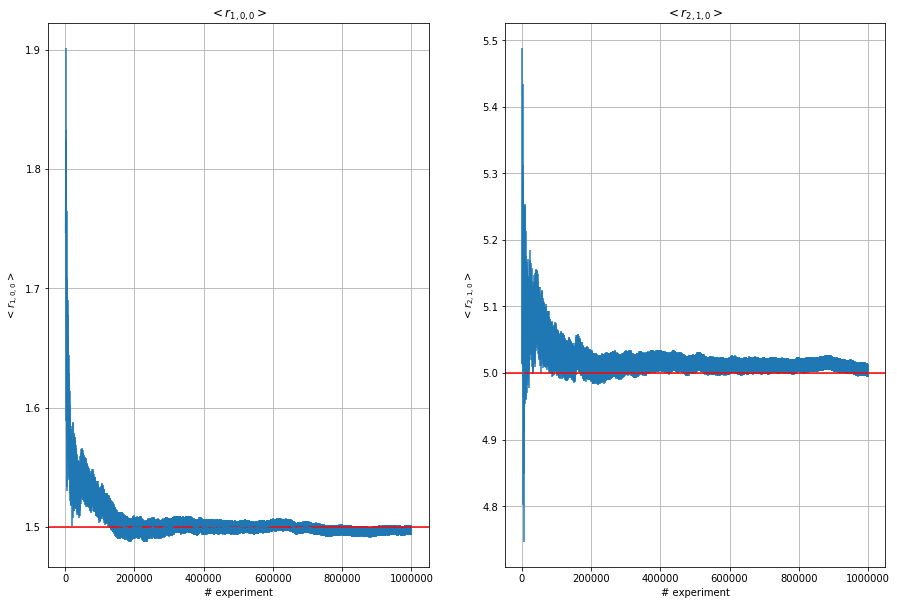

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

data_file=np.loadtxt('data_ground_uniforme.dat')
data_file2=np.loadtxt('data_ecc_uniforme.dat')

x=data_file [:,0]
sum_prog=data_file [:,1]
err_prog=data_file[:,2]

x2=data_file2 [:,0]
sum_prog2=data_file2 [:,1]
err_prog2=data_file2[:,2]


figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,10))
axes[0].errorbar(x,sum_prog,yerr=err_prog)
axes[0].set_xlabel('# experiment')
axes[0].set_ylabel('$< r_{1,0,0} >$')
axes[0].set_title('$< r_{1,0,0} >$')
axes[0].grid(True)
axes[0].axhline(y=3/2, color='r', linestyle='-')


axes[1].errorbar(x2,sum_prog2,yerr=err_prog2)
axes[1].set_xlabel('# experiment')
axes[1].set_ylabel('$< r_{2,1,0} >$')
axes[1].set_title('$< r_{2,1,0} >$')
axes[1].grid(True)
axes[1].axhline(y=5, color='r', linestyle='-')
plt.show()

Per ottenere tali grafici è stato inoltre opportuno effettuare una scelta sulla lunghezza dei blocchi adoperati per il blocking method di modo da non avere correlazione tra i vari blocchi.

Si è poi effettuato lo stesso esperimento con una probabilità di transizione gaussiana. Abbiamo quindi usato le stesse funzioni d'onda per e gli stessi punti iniziali utilizzati in precedenza ma abbiamo dovuto fare nuovamente un lavoro di ottimizzazione per avere un'accettazione al 50%.

In questo caso però non ho lavorato sulla lunghezza del passo ma sulla $\sigma$ della gaussiana presa in esame. Infatti in questo caso per selezionare un nuovo punto si prende una gaussiana centrata nel punto iniziale e si sceglie casualmente un punto all'interno di questa gaussiana; successiavemente si applica l'algoritmo di Metropolis per accettare o meno la mossa.

I nuovi parametri usati, dunque, sono:
$$\sigma_{\Psi_{1,0,0}}=0.75 \quad \sigma_{\Psi_{2,1,0}}=2.0$$

con cui si sono ottenuti dei rate di accettazione rispettivamente di 50.4956% e 49.9923%.

Si mostrano ora i grafici ottenuti per $\left\langle r_{1,0,0} \right\rangle$ e $\left\langle r_{2,1,0} \right\rangle$ ottenuti a seguito di data blocking sulle distanze dei punti campionati con le relative incertezze in funzione del numero di esperimenti (in azzurro) e il valore atteso (in rosso).

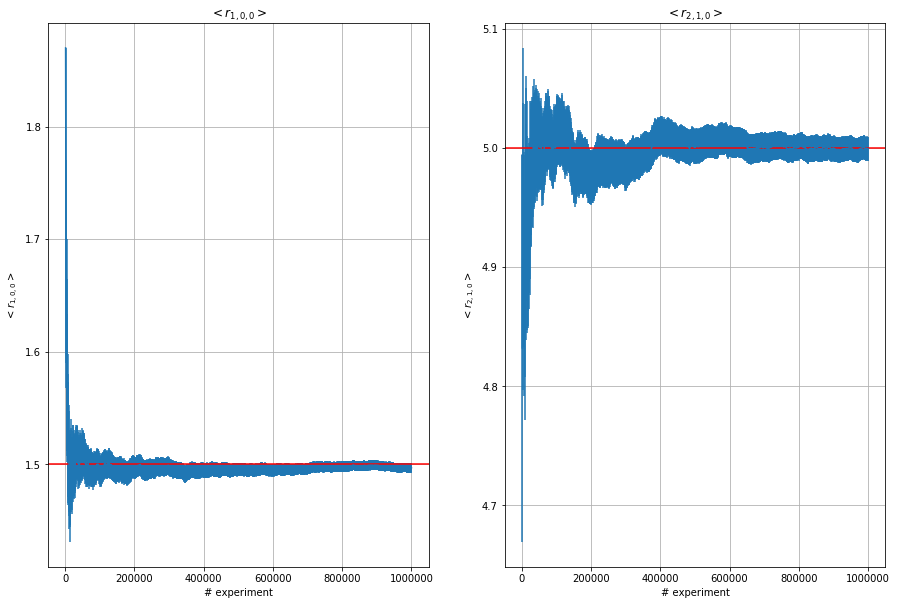

In [5]:
data_file3=np.loadtxt('data_ground_Gaussiano.dat')
data_file4=np.loadtxt('data_ecc_Gaussiano.dat')

x3=data_file3 [:,0]
sum_prog3=data_file3 [:,1]
err_prog3=data_file3[:,2]

x4=data_file4 [:,0]
sum_prog4=data_file4 [:,1]
err_prog4=data_file4[:,2]

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,10))
axes[0].errorbar(x3,sum_prog3,yerr=err_prog3)
axes[0].set_xlabel('# experiment')
axes[0].set_ylabel('$< r_{1,0,0} >$')
axes[0].set_title('$< r_{1,0,0} >$')
axes[0].grid(True)
axes[0].axhline(y=3/2, color='r', linestyle='-')


axes[1].errorbar(x4,sum_prog4,yerr=err_prog4)
axes[1].set_xlabel('# experiment')
axes[1].set_ylabel('$< r_{2,1,0} >$')
axes[1].set_title('$< r_{2,1,0} >$')
axes[1].grid(True)
axes[1].axhline(y=5, color='r', linestyle='-')
plt.show()

Notiamo che i risultati sono equivalenti rispetto al campionamento uniforme.